In [18]:
import geopandas as gpd
import re
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.colors import Normalize  # 色の濃淡を表現
from shapely.geometry import Polygon  # 読み込んだデータをポリゴン形式に
from japanmap import get_data, pref_points  # 日本地図の描画


# 地理空間データの加工・可視化
- 地理空間データは、多くの市場で使用可能なデータとなっている。
    - 公的機関が一般公開していてとても有用
    - 様々なデータを組み合わせることが可能な応用力の高いデータ
## データ分析においては
- 商圏分析
- 適地選定
- 顧客分析
- BCP（事業継続計画: 防災・災害対策）
- 掃除ロボットの制御、紛失防止タグのような屋内測位技術

に用いられる。

## AI 予測であれば
- 感染症の感染予測マップ
- 不動産売買の適正価格予測

などに活用。

## 地理空間データの特徴や用語
### Shapefile
複数のファイルからなる GIS データのフォーマットの１つ。建物や道路の位置や形状、属性情報を持つベクターデータを格納するためのファイル形式。

### GIS（Geographic Information System）
地理情報システムの略称。地理空間データを総合的に管理・加工し、可視化や分析する仕組みを指す。
1. ラスターデータ
    - 地表を画像のように格子状に分割し、ピクセルごとに値を持っているデータ。
    - ピクセル座標を置換してピクセル１つ１つをテーブルデータとして扱う。
    - 実際の地形を画像として表現し、衛星写真や空中写真としての利用が多い
    - **１つ１つの地形や建造物に対して詳細で特徴を捉えたデータを扱うことが可能**
    - ピクセルの持つ情報量がデータ量に直結するため処理時間の問題、大規模な可視化による解析が難しい。
2. ベクターデータ
    - 点、線、ポリゴン（面）の３種の要素から構成。
        - 点: 位置情報
        - 線：経路情報
        - ポリゴン: 範囲情報
        に対応していると考えると理解しやすい。
    - 数的処理により表現するため、少ないデータ量で情報量の多い可視化を行うことができる
    - ピクセルではないため、スケールに依存せず、縮尺による情報の歪みが発生しない。
    - 連続的な色彩表現や、画像による詳細表現は苦手。
    - 地形図などは作成可能。

In [2]:
path_master = 'data/L01-18.shp'
gdf_master = gpd.read_file(path_master)
# Shapefile は、geopandas で DataFrame のように扱うことができる。
# .shp ファイルが保存されている同一ディレクトリ無いに dpf, shx, shp を配置しておくこと。

gdf_master

,L01_001,L01_002,L01_003,L01_004,L01_005,L01_006,L01_007,L01_008,L01_009,L01_010,...,L01_118,L01_119,L01_120,L01_121,L01_122,L01_123,L01_124,L01_125,L01_126,geometry
0,005,002,005,002,2018,65100,1,false,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,10000000000000,POINT (124.14933 24.34700)
1,000,002,000,002,2018,40200,1,false,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,10000000000000,POINT (124.15515 24.34429)
2,005,001,005,001,2018,131000,1,false,false,false,...,10000000000000,10000000000000,10011000000000,10011000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,POINT (124.15802 24.33948)
3,000,001,000,001,2018,42000,1,false,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (124.16232 24.33711)
4,000,003,000,003,2018,38200,1,false,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (124.17377 24.34110)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25983,000,003,000,003,2018,14600,1,false,false,false,...,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,40000000000000,10000000000000,POINT (144.99874 43.55283)
25984,000,001,000,001,2018,10600,1,false,false,false,...,10000000000000,10000000000000,10000000000000,11100000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (145.56593 43.31827)
25985,005,001,005,001,2018,25500,1,false,false,false,...,10000000000000,20000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (145.58215 43.33246)
25986,000,003,000,003,2018,10300,1,false,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (145.58364 43.32447)


In [3]:
# Geometry の確認
print(type(gdf_master['geometry']))  # データ型: geometry
# POINT（点）, LINE（線）, POLYGON（面） のいずれかのクラスとして格納される。
gdf_master['geometry']

<class 'geopandas.geoseries.GeoSeries'>


0        POINT (124.14933 24.34700)
1        POINT (124.15515 24.34429)
2        POINT (124.15802 24.33948)
3        POINT (124.16232 24.33711)
4        POINT (124.17377 24.34110)
                    ...            
25983    POINT (144.99874 43.55283)
25984    POINT (145.56593 43.31827)
25985    POINT (145.58215 43.33246)
25986    POINT (145.58364 43.32447)
25987    POINT (145.60059 43.33091)
Name: geometry, Length: 25988, dtype: geometry

今回のデータは、 geometry の各セルに POINT として１点の座標情報が格納されている様子。

In [4]:
# GeoJSON の確認
path_master_json = 'data/L01-18.geojson'
gdf_master_json = gdf_master_json = gpd.read_file(path_master_json)  # GeoJSON形式も　`.read_file()` で読み込み可能

gdf_master_json

,L01_001,L01_002,L01_003,L01_004,L01_005,L01_006,L01_007,L01_008,L01_009,L01_010,...,L01_118,L01_119,L01_120,L01_121,L01_122,L01_123,L01_124,L01_125,L01_126,geometry
0,005,002,005,002,2018,65100,1,false,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,10000000000000,POINT (124.14933 24.34700)
1,000,002,000,002,2018,40200,1,false,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,10000000000000,10000000000000,10000000000000,POINT (124.15515 24.34429)
2,005,001,005,001,2018,131000,1,false,false,false,...,10000000000000,10000000000000,10011000000000,10011000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000010000000,POINT (124.15802 24.33948)
3,000,001,000,001,2018,42000,1,false,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (124.16232 24.33711)
4,000,003,000,003,2018,38200,1,false,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (124.17377 24.34110)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25983,000,003,000,003,2018,14600,1,false,false,false,...,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,40000000000000,10000000000000,POINT (144.99874 43.55283)
25984,000,001,000,001,2018,10600,1,false,false,false,...,10000000000000,10000000000000,10000000000000,11100000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (145.56593 43.31827)
25985,005,001,005,001,2018,25500,1,false,false,false,...,10000000000000,20000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (145.58215 43.33246)
25986,000,003,000,003,2018,10300,1,false,false,false,...,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,10000000000000,POINT (145.58364 43.32447)


`gdf_master` と同じ GeoDataFrame。

#### Data の概要
- レコード件数より、日本全国 25988箇所のデータを持っていることが分かる。
- Columns
    - 「L01_XX」始まりが126種類

    >※対応する属性名は「国土数値情報 DL Site に記載（https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-L01-v2_4.html）
    - geometry が１種類

In [5]:
# Columns の変更
gdf = gdf_master[['L01_006', 'L01_023', 'geometry']].rename(columns={'L01_006': 'advertised_price', 'L01_023': 'address'})

gdf

,advertised_price,address,geometry
0,65100,沖縄県 石垣市新栄町７０番１２,POINT (124.14933 24.34700)
1,40200,沖縄県 石垣市字新川喜田盛１４番１,POINT (124.15515 24.34429)
2,131000,沖縄県 石垣市字大川中ノハカ２０７番３,POINT (124.15802 24.33948)
3,42000,沖縄県 石垣市字登野城村内１０４番,POINT (124.16232 24.33711)
4,38200,沖縄県 石垣市字平得西原１２９番３,POINT (124.17377 24.34110)
...,...,...,...
25983,14600,北海道 標津郡中標津町東２１条南１０丁目１０番,POINT (144.99874 43.55283)
25984,10600,北海道 根室市西浜町３丁目１９３番１外,POINT (145.56593 43.31827)
25985,25500,北海道 根室市常盤町３丁目６番３,POINT (145.58215 43.33246)
25986,10300,北海道 根室市宝林町１丁目７０番２,POINT (145.58364 43.32447)


In [6]:
# address から都道府県名から住所を抽出
def extract_prefecture(address: str) -> str | None:
    """
    指定された住所文字列から都道府県を抽出します。

    この関数は、正規表現を使用して、指定された住所文字列内の都道府県名を検索します。
    東京、北海道、京都、大阪などの都道府県や、"県" で終わる (2 文字または 3 文字で構成される) その他の都道府県を識別します。
    都道府県が見つかった場合は、一致した都道府県名を返します。 それ以外の場合は None を返します。

    :param address: 都道府県を抽出する入力住所文字列。
    :type address: str
    :return: 見つかった場合は抽出された都道府県名、それ以外の場合は None。
    :rtype: str | None
    """
    match = re.search('東京都|北海道|(?:京都|大阪)府|.{2,3}県', address)
    if match:
        return match.group()
    else:
        return None

In [7]:
gdf['都道府県'] = gdf['address'].apply(extract_prefecture)
gdf

,advertised_price,address,geometry,都道府県
0,65100,沖縄県 石垣市新栄町７０番１２,POINT (124.14933 24.34700),沖縄県
1,40200,沖縄県 石垣市字新川喜田盛１４番１,POINT (124.15515 24.34429),沖縄県
2,131000,沖縄県 石垣市字大川中ノハカ２０７番３,POINT (124.15802 24.33948),沖縄県
3,42000,沖縄県 石垣市字登野城村内１０４番,POINT (124.16232 24.33711),沖縄県
4,38200,沖縄県 石垣市字平得西原１２９番３,POINT (124.17377 24.34110),沖縄県
...,...,...,...,...
25983,14600,北海道 標津郡中標津町東２１条南１０丁目１０番,POINT (144.99874 43.55283),北海道
25984,10600,北海道 根室市西浜町３丁目１９３番１外,POINT (145.56593 43.31827),北海道
25985,25500,北海道 根室市常盤町３丁目６番３,POINT (145.58215 43.33246),北海道
25986,10300,北海道 根室市宝林町１丁目７０番２,POINT (145.58364 43.32447),北海道


In [8]:
print(gdf['都道府県'].unique())  # 一意の値を確認
print(gdf['都道府県'].nunique())  # 一意の値の数を確認

['沖縄県' '鹿児島県' '長崎県' '佐賀県' '熊本県' '福岡県' '宮崎県' '山口県' '大分県' '島根県' '広島県' '愛媛県'
 '高知県' '鳥取県' '岡山県' '香川県' '徳島県' '兵庫県' '京都府' '和歌山県' '大阪府' '福井県' '奈良県' '滋賀県'
 '三重県' '石川県' '岐阜県' '愛知県' '富山県' '静岡県' '長野県' '新潟県' '山梨県' '群馬県' '埼玉県' '神奈川県'
 '東京都' '栃木県' '福島県' '山形県' '茨城県' '千葉県' '秋田県' '北海道' '青森県' '宮城県' '岩手県']
47


In [10]:
gdf.dtypes

advertised_price      object
address               object
geometry            geometry
都道府県                  object
dtype: object

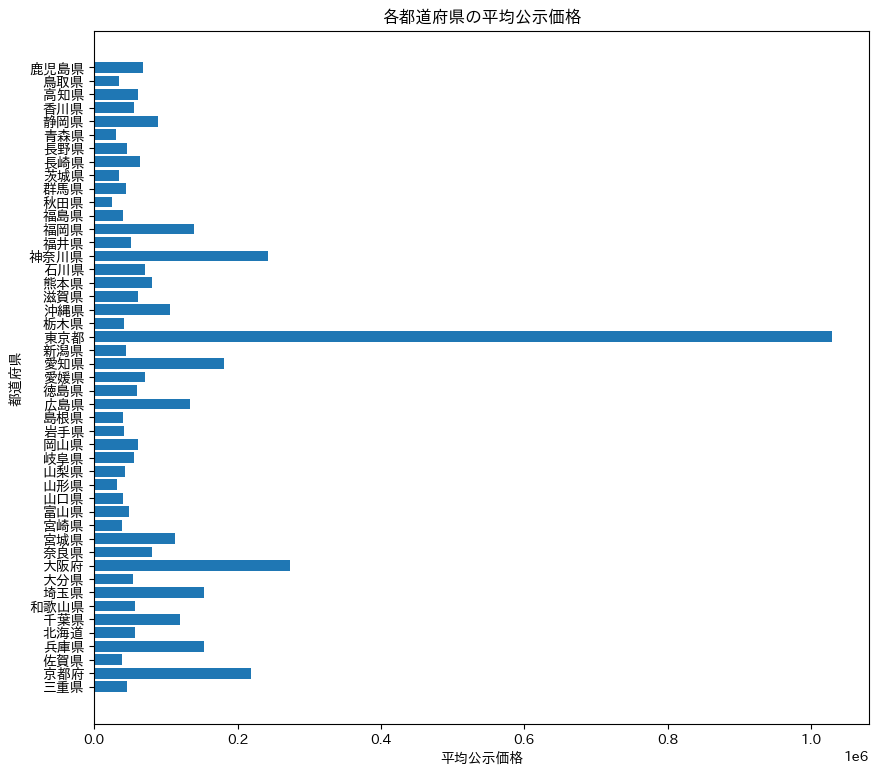

In [21]:
# 都道府県ごとの平均公示価格を可視化
gdf['advertised_price'] = gdf['advertised_price'].astype(int)
gdf_avg = gdf.groupby('都道府県')['advertised_price'].mean().reset_index()

fig, ax = plt.subplots(1, 1, figsize=(10, 9))
ax.barh(gdf_avg['都道府県'], gdf_avg['advertised_price'])
ax.set_xlabel('平均公示価格')
ax.set_ylabel('都道府県')

plt.title('各都道府県の平均公示価格')
plt.show()

東京都の公示価格が著しく高い。首都圏近郊の神奈川や関西地方の京都府、大阪府も他県と比較すると高いように見える。

<Axes: >

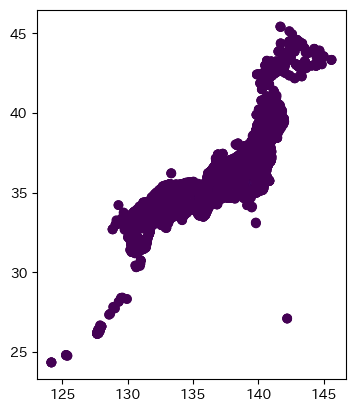

In [12]:
# 公示価格の全量を可視化
gdf.plot(column = 'advertised_price')

47都道府県分が存在している為、点の集合が日本地図のような形になっている。

<Axes: >

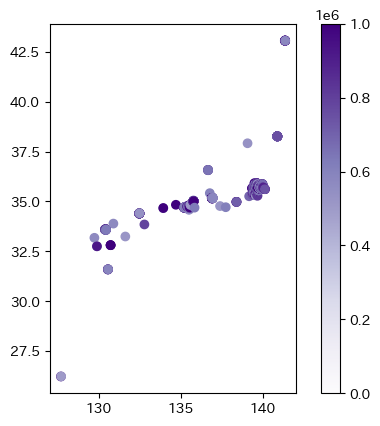

In [16]:
# 公示価格が 500,000円以上のデータを洗濯し価格によって濃淡をつけて可視化
norm = Normalize(vmin=0, vmax=1e6)  # Colormap の濃淡の上限と下限を設定
# ※データの分布が一点に集中している場合などは色幅を狭く設定することで色の変化を意図的に激しくすることができる。

gdf_over = gdf.loc[gdf['advertised_price'] > 500_000]
gdf_over.plot(column='advertised_price',
              norm=norm,  # 色の変化幅
              cmap='Purples',  # 色の設定
              legend=True)  # カラーバーの有無

>

首都圏や関西地方に 500,000円以上の土地が集中している。
先に確認した都道府県ごとの平均公示価格が高い地域と類似している。


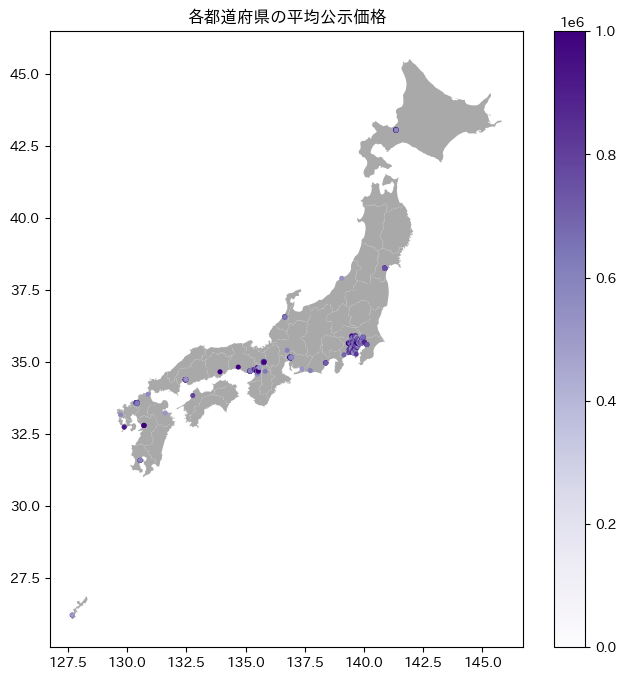

In [19]:
# 日本地図を可視化
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

japan_poly = [Polygon(points) for points in pref_points(get_data())]  # 読み込んだ日本地図のデータをポリゴン形式に
# japan_ploy = １つ１つが各都道府県のポリゴンデータ（総数: 47）

# 日本地図のポリゴンデータを GeoDataFrame に
gdf_japan = gpd.GeoDataFrame(geometry=japan_poly,
                             crs='epsg:4612')  # 座標参照系を指定

gdf_japan.plot(color='darkgray', ax=ax)
gdf_over.plot(column='advertised_price',
              cmap='Purples',
              norm=norm,
              legend=True,
              ax=ax,
              s=7)  # Plot される点のサイズ
plt.title('各都道府県の平均公示価格')
plt.show()

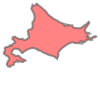

In [23]:
# japan_ploy で地図を出力できる
japan_poly[0]  # 北海道

東北地方にあった一点は、宮城県仙台市の土地であることが分かった。